NOTE: This notebook does not exist in a Jupyter environment where the SQL code can be ran, so images of the resulting queries from the SQLite test environment are provided. All will generate syntax errors if ran. Sorry about that!

In this project, we are acting as an analyst at a business who sells vehicles, and we are
performing analysis to help the business on multiple fronts, including sales, marketing,
communications, and operations.

To familiarize ourselves with the data, this first query is to get the number of columns
and rows of each table we are working with in our database.

SELECT "Customers" AS table_name, 13 AS number_of_attributes, COUNT(*) AS number_of_rows
FROM customers

UNION ALL

SELECT "Products" AS table_name, 9 AS number_of_attributes, COUNT(*) AS number_of_rows
FROM products

UNION ALL

SELECT "ProductLines" AS table_name, 4 AS number_of_attributes, COUNT(*) AS number_of_rows
FROM productlines

UNION ALL

SELECT "Orders" AS table_name, 7 AS number_of_attributes, COUNT(*) AS number_of_rows
FROM orders

UNION ALL

SELECT "OrderDetails" AS table_name, 5 AS number_of_attributes, COUNT(*) AS number_of_rows
FROM orderdetails

UNION ALL

SELECT "Payments" AS table_name, 4 AS number_of_attributes, COUNT(*) AS number_of_rows
FROM payments

UNION ALL

SELECT "Employees" AS table_name, 8 AS number_of_attributes, COUNT(*) AS number_of_rows
FROM employees

UNION ALL

SELECT "Offices" AS table_name, 9 AS number_of_attributes, COUNT(*) AS number_of_rows
FROM offices

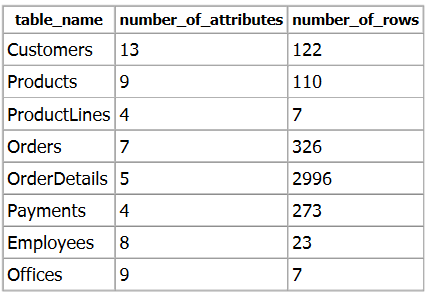

We are interested here in which are our best performing products, and more specifically
we want an answer to the question - "Which products should we order more or less of?"

To determine an answer to this, we want to determine a ranking of product performance
to guide us in the decision of which products we should emphasize or de-emphasize
based on their performance rating.

The first of the performance ratings we are going to choose here is what we will call 
"demand rating" which is the quantity ordered of a particular item divided by the amount
currently in stock. (SUM(ordered)/stockquantity)
We will perform this query on a seperate tab called "DemandRating".

The second one will be the gross sales per product, which is the total sum in dollars
of the sales revenue generated from each item. (SUM(ordered*listprice))

We are going to limit this query to only returning the top 10 highest demand products.

Below we will perform a query that will return a table containing products ranked by these
ratings established above.

SELECT productName, SUM(quantityOrdered) AS total_ordered, buyPrice, 
	   SUM(quantityOrdered*(od.priceEach - p.buyPrice)) AS gross_profit
  FROM products p
  JOIN orderdetails od ON p.productCode = od.productCode
 GROUP BY productName
 ORDER BY gross_profit DESC
 LIMIT 10

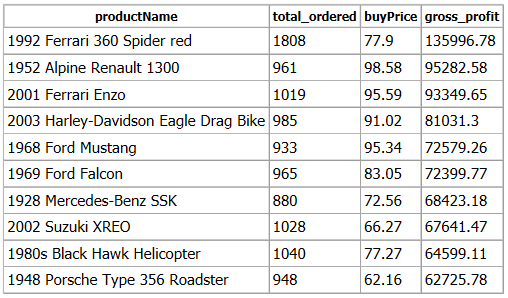